# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm,neighbors,metrics
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [5]:
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')


# 1. Exploring your data / Diagnosis phase

## 1.1 Diagnose data for cleaning


In [6]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
df.shape

(1470, 35)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
df.index

RangeIndex(start=0, stop=1470, step=1)

## 1.2 Exploratory data analysis

In [12]:
for col in df.columns:
    x = df[col].value_counts()
    print("Column name:",col," has different values of:",x.count())
    print("==========================================================")


Column name: Age  has different values of: 43
Column name: Attrition  has different values of: 2
Column name: BusinessTravel  has different values of: 3
Column name: DailyRate  has different values of: 886
Column name: Department  has different values of: 3
Column name: DistanceFromHome  has different values of: 29
Column name: Education  has different values of: 5
Column name: EducationField  has different values of: 6
Column name: EmployeeCount  has different values of: 1
Column name: EmployeeNumber  has different values of: 1470
Column name: EnvironmentSatisfaction  has different values of: 4
Column name: Gender  has different values of: 2
Column name: HourlyRate  has different values of: 71
Column name: JobInvolvement  has different values of: 4
Column name: JobLevel  has different values of: 5
Column name: JobRole  has different values of: 9
Column name: JobSatisfaction  has different values of: 4
Column name: MaritalStatus  has different values of: 3
Column name: MonthlyIncome  h

In [13]:
df=df.drop('Over18',axis=1)
df=df.drop('EmployeeCount',axis=1)
df=df.drop('StandardHours',axis=1)
df=df.drop('EmployeeNumber',axis=1)


In [14]:
categorical_columns = []
numerical_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [15]:
for col in categorical_columns:
    print(f"{col} : {df[col].unique()}")
    print(df[col].value_counts())
    print(*'-'*20)


Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
- - - - - - - - - - - - - - - - - - - -
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
- - - - - - - - - - - - - - - - - - - -
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
- - - - - - - - - - - - - - - - - - - -
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
- - - - - - - - - - - - - - - - - - - -
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64

In [16]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 1.3 Visual exploratory data analysis


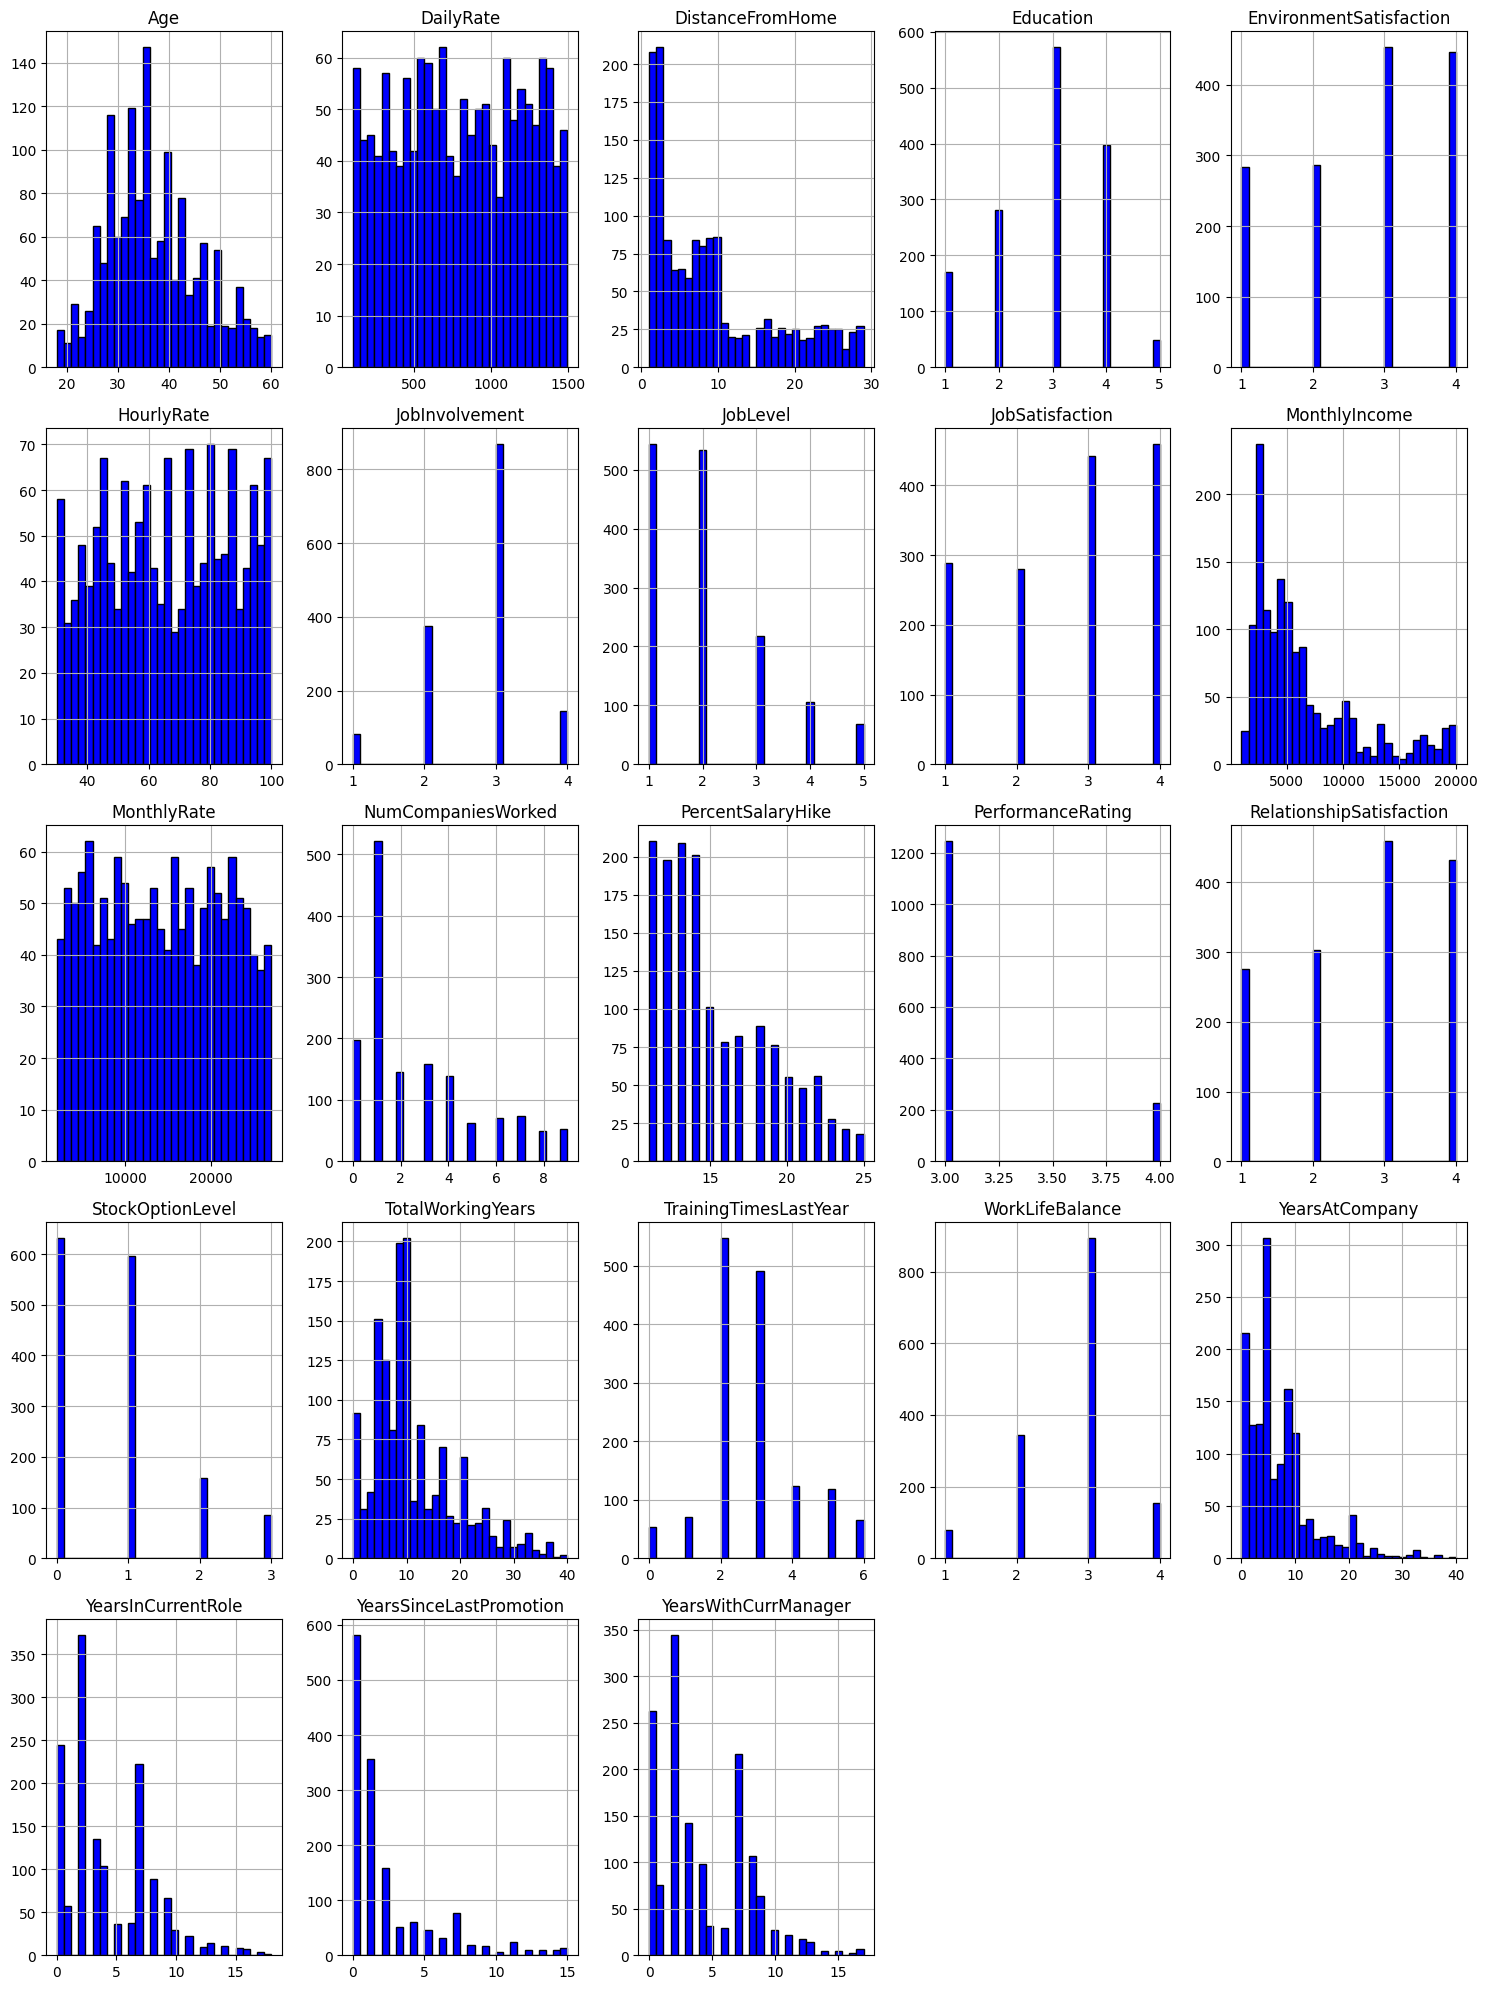

In [17]:
df[numerical_columns].hist(bins=30, figsize=(15, 20), color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

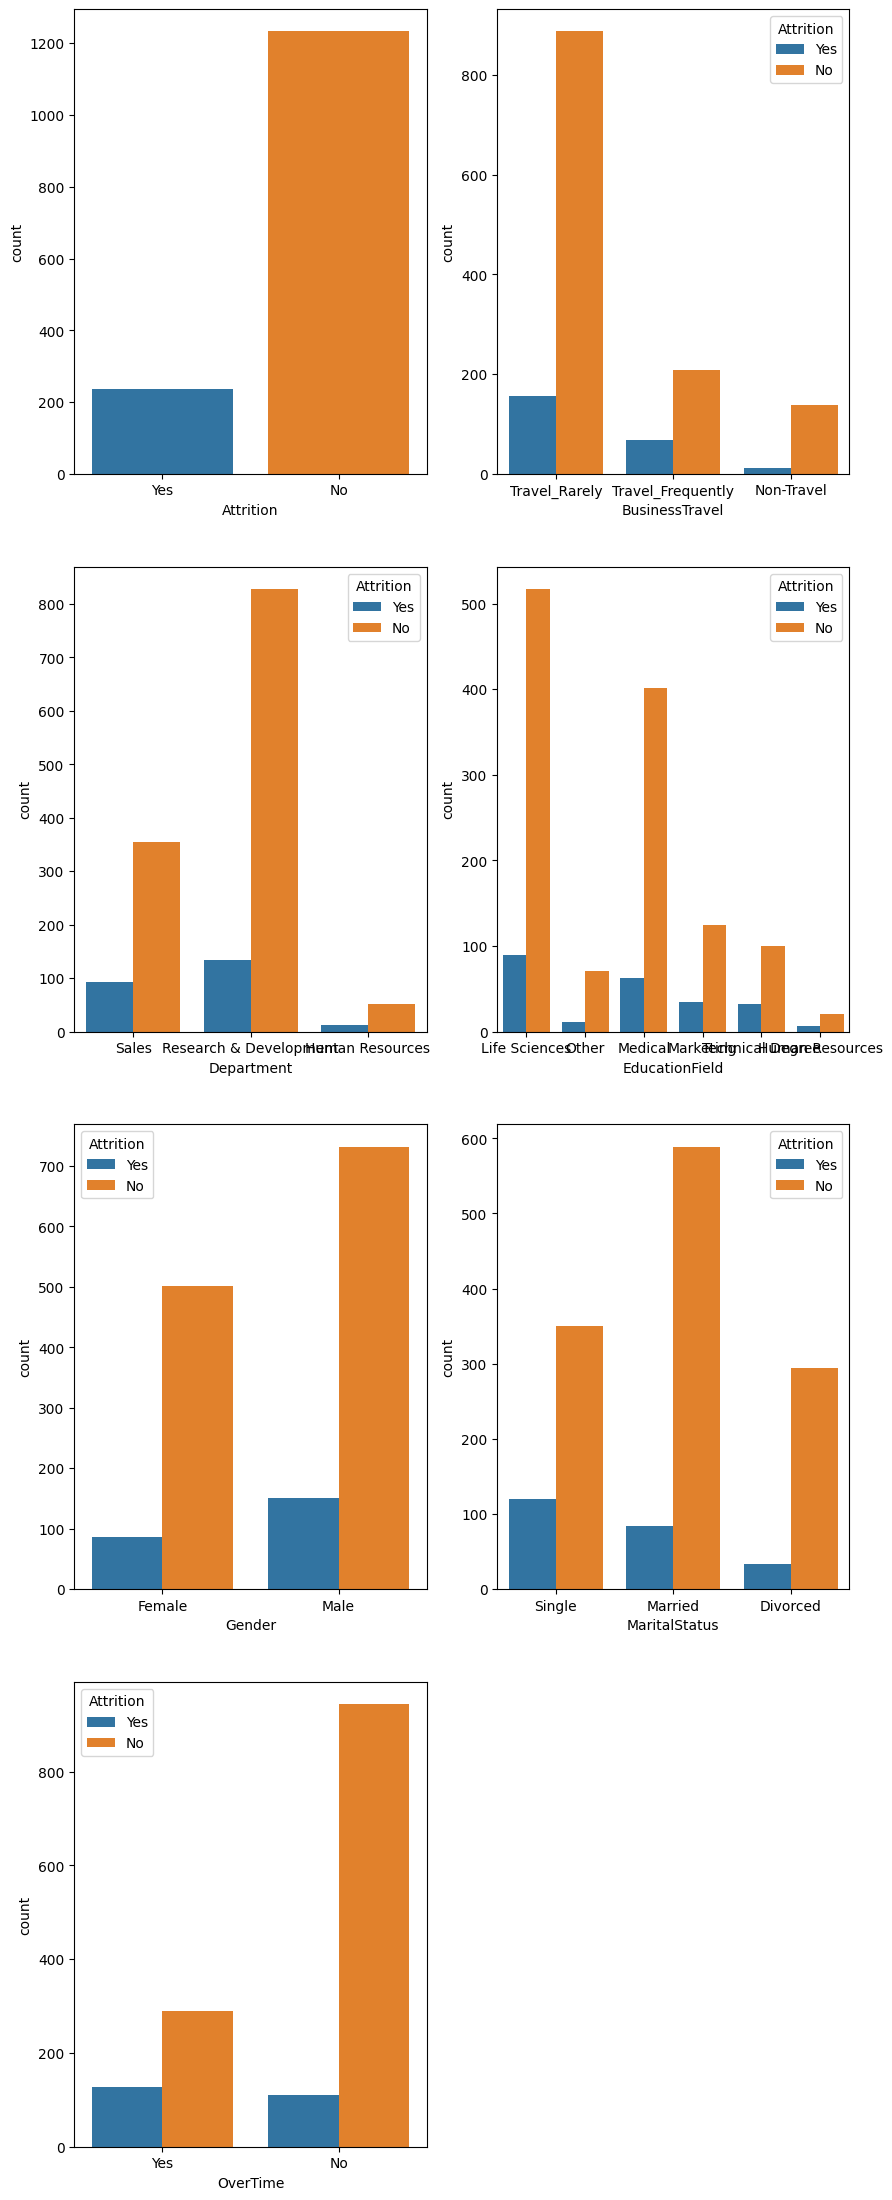

In [18]:
subplot=520
i=1
plt.figure(figsize=(10,35))
for col in categorical_columns:
    if col=="JobRole":
        continue
    subplot+=1
    plt.subplot(subplot)
    sns.countplot(data=df,x=col,hue='Attrition')





# 2. Cleaning data for analysis

## 2.1 Fix Structure Error

In [19]:
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   catego

## 2.2 Duplicate and missing data

In [21]:
df.drop_duplicates(subset=None,keep='first',inplace=True)


In [22]:
print("Missing values per column:")
print(df.isnull().sum(axis=0))

Missing values per column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


# 3. Check Correlations

In [23]:
corr_mat=df[numerical_columns].corr()
print(corr_mat)

                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251 

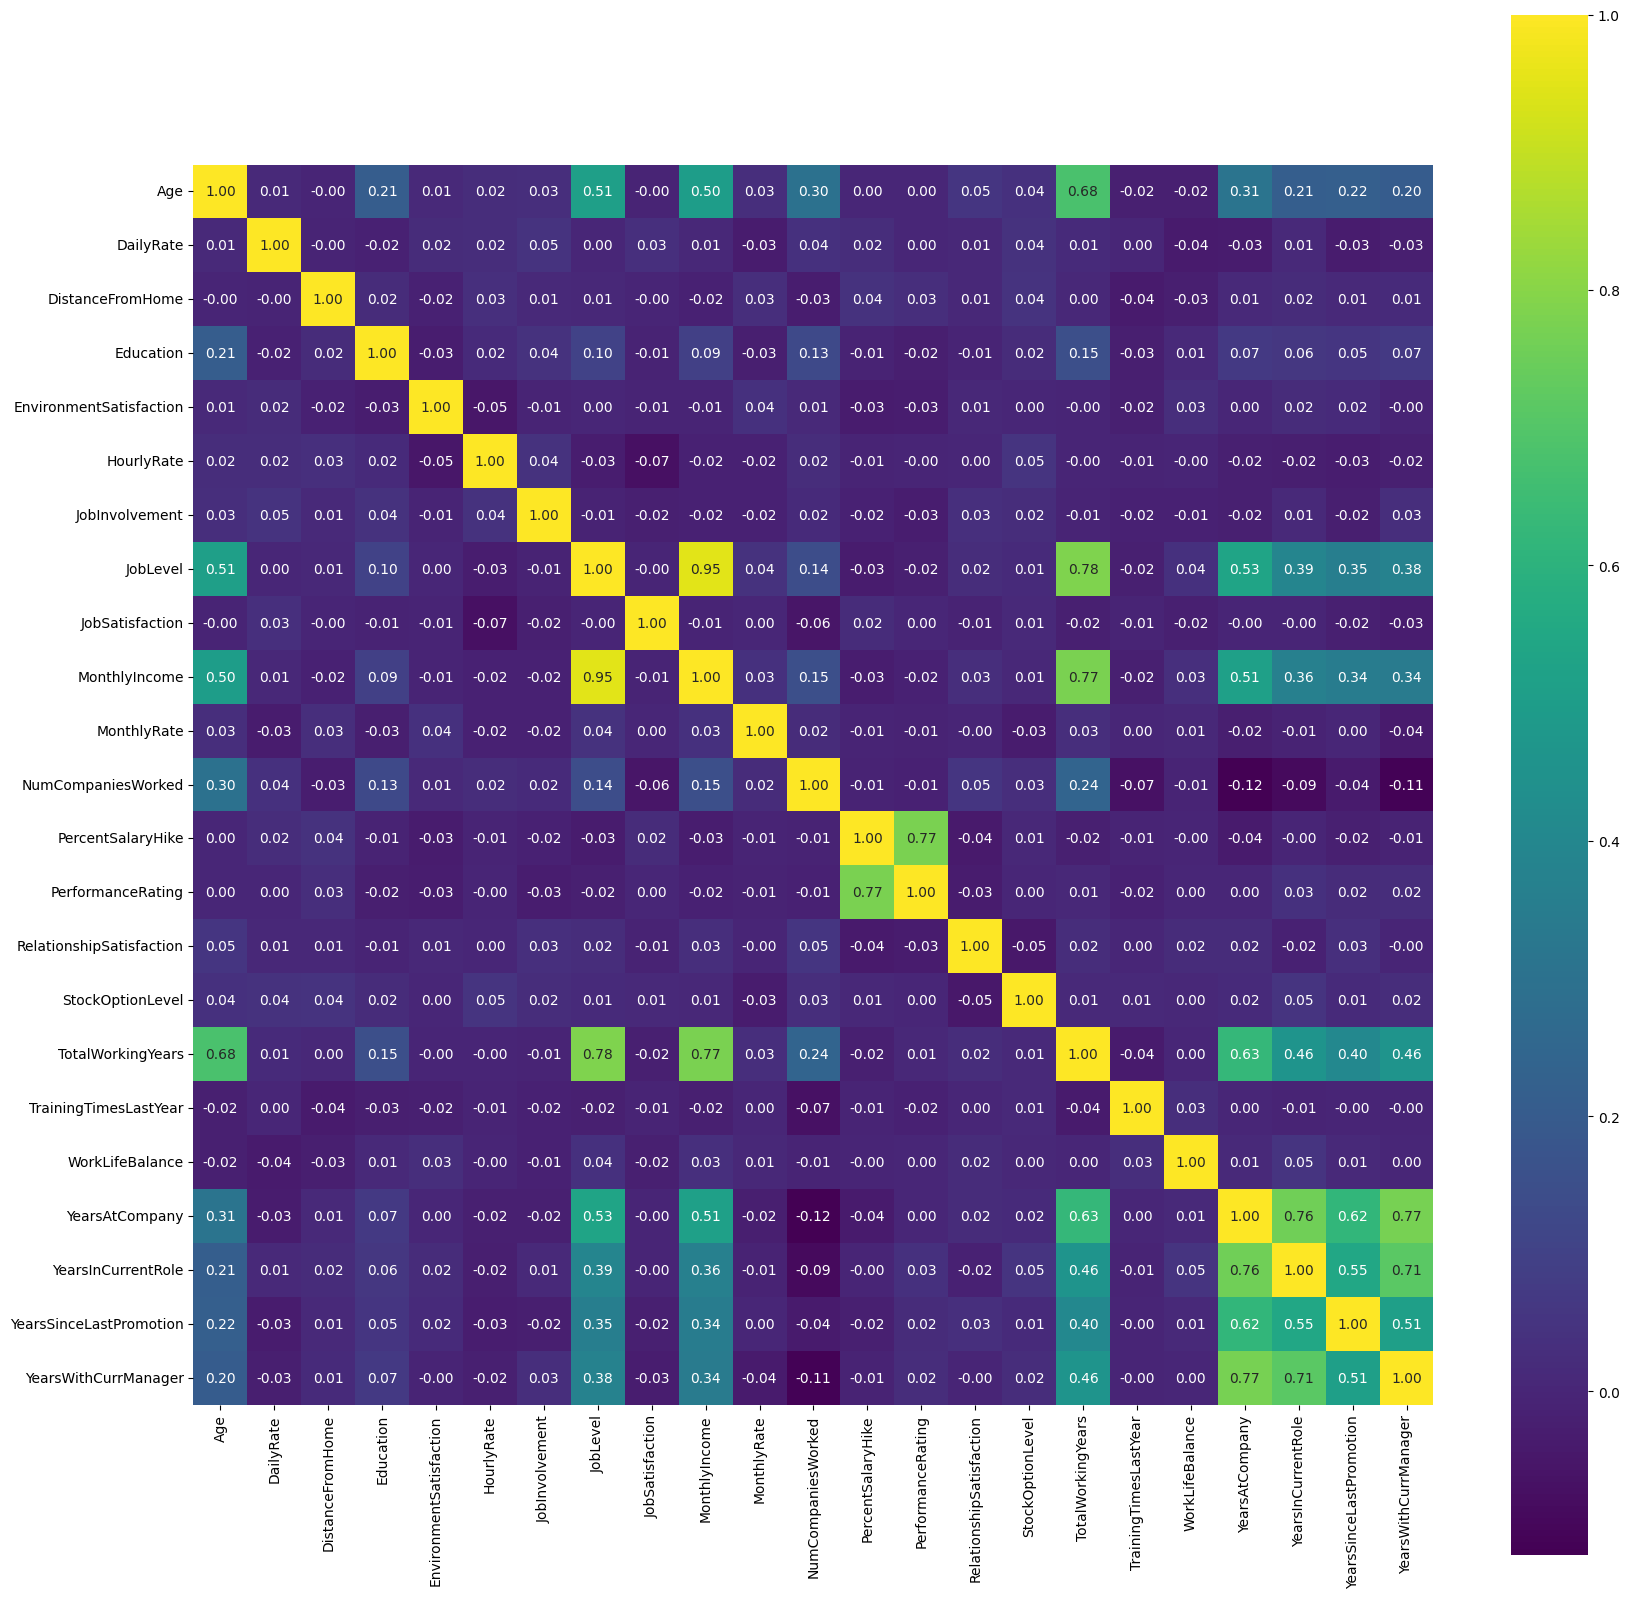

In [24]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat,annot=True, fmt=".2f", cmap='viridis', square=True, cbar=True)
plt.show()

# 4. Applying machine learning algorithms

In [25]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,3,2090,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,True,False,False,False,False,False,False,True,False,False


In [26]:
print(df_encoded.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole

In [27]:
scaler=StandardScaler()
df_encoded[numerical_columns]=scaler.fit_transform(df_encoded[numerical_columns])
df_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,False,False,False,False,False,True,False,False,True,True
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,False,False,False,False,True,False,False,True,False,False
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,True,False,False,False,False,False,False,False,True,True
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,False,False,False,False,True,False,False,True,False,True
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,True,False,False,False,False,False,False,True,False,False


In [28]:
x=df_encoded.drop('Attrition_Yes',axis=1)
y=df_encoded['Attrition_Yes']



In [29]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
print("Class distribution after SMOTE:", y_resampled.value_counts())


Class distribution after SMOTE: Attrition_Yes
True     1233
False    1233
Name: count, dtype: int64


## 4.1 Logistic Regression

In [30]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_predict_logistic=log_model.predict(x_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_predict_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_logistic))
print("Classification Report:\n", classification_report(y_test, y_predict_logistic))

Accuracy: 0.8967611336032388
Confusion Matrix:
 [[228  19]
 [ 32 215]]
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.92      0.90       247
        True       0.92      0.87      0.89       247

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



## 4.2 Support Vector Machine (SVM)

In [33]:
svc_model=svm.SVC(kernel='linear')
svc_model.fit(x_train,y_train)

SVC(kernel='linear')

In [34]:
y_predict_svc=svc_model.predict(x_test)

In [35]:
print("Accuracy:", accuracy_score(y_test, y_predict_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_svc))
print("Classification Report:\n", classification_report(y_test, y_predict_svc))

Accuracy: 0.9048582995951417
Confusion Matrix:
 [[233  14]
 [ 33 214]]
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.94      0.91       247
        True       0.94      0.87      0.90       247

    accuracy                           0.90       494
   macro avg       0.91      0.90      0.90       494
weighted avg       0.91      0.90      0.90       494



## 4.3 K-Nearest Neighbors (KNN)

In [36]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
y_predict_knn = knn_model.predict(x_test)

In [38]:
print("Accuracy:", accuracy_score(y_test, y_predict_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_knn))
print("Classification Report:\n", classification_report(y_test, y_predict_knn))

Accuracy: 0.8643724696356275
Confusion Matrix:
 [[186  61]
 [  6 241]]
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.75      0.85       247
        True       0.80      0.98      0.88       247

    accuracy                           0.86       494
   macro avg       0.88      0.86      0.86       494
weighted avg       0.88      0.86      0.86       494



## 4.4 Random Forest

In [39]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_predict_rf = rf_model.predict(x_test)

In [41]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_predict_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_rf))
print("Classification Report:\n", classification_report(y_test, y_predict_rf))


Random Forest Accuracy: 0.9230769230769231
Confusion Matrix:
 [[232  15]
 [ 23 224]]
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.94      0.92       247
        True       0.94      0.91      0.92       247

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



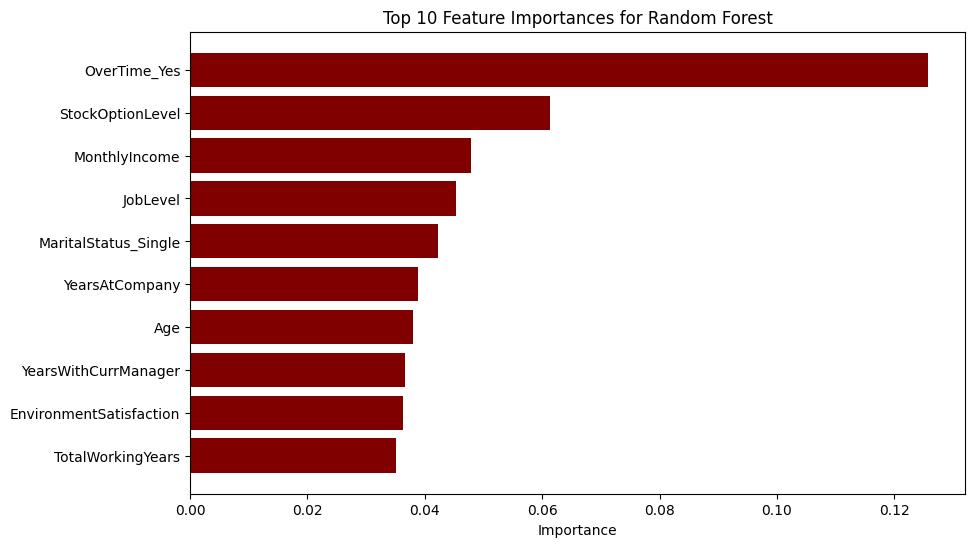

In [42]:
importances = rf_model.feature_importances_
feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='Maroon')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances for Random Forest')
plt.show()


In [45]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


KeyboardInterrupt: 

## 4.5 ML Model Comparison

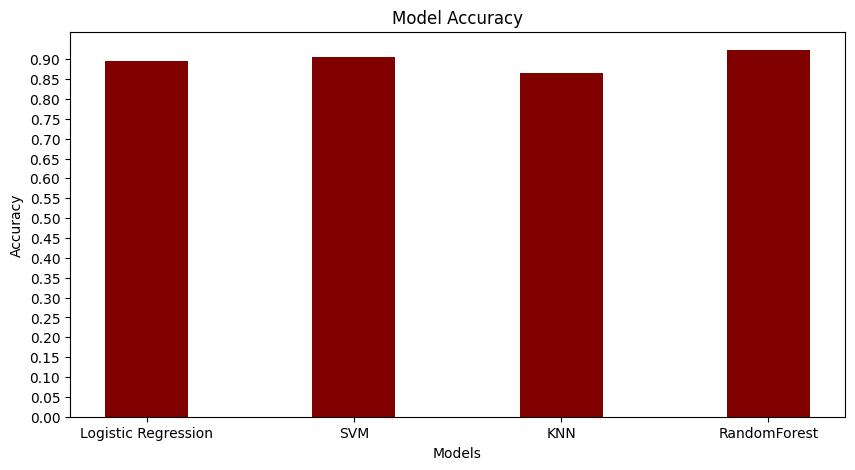

In [44]:

models = ['Logistic Regression', 'SVM','KNN','RandomForest']
accuracy = [metrics.accuracy_score(y_test, y_predict_logistic), metrics.accuracy_score(y_test, y_predict_svc),
            metrics.accuracy_score(y_test, y_predict_knn),metrics.accuracy_score(y_test,y_predict_rf)]
plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color = 'Maroon', width = 0.4)
y_ticks = np.arange(0, 0.95, 0.05)
plt.yticks(y_ticks)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# 5. DNN Model

## 5.1 Tensor Flow Model


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
x_train_tf=tf.convert_to_tensor(x_train,dtype=tf.float32)
y_train_tf=tf.convert_to_tensor(y_train,dtype=tf.float32)
x_test_tf=tf.convert_to_tensor(x_test,dtype=tf.float32)
y_test_tf=tf.convert_to_tensor(y_test,dtype=tf.float32)

In [48]:
model_tf=Sequential([
    Dense(64,activation='relu',input_shape=(x_train_tf.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model_tf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model_tf.compile('adam',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [51]:
history_tf  = model_tf.fit(x_train_tf,y_train_tf,epochs=20, batch_size=32,validation_data=(x_test_tf,y_test_tf))

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - acc: 0.6254 - loss: 0.6360 - val_acc: 0.7449 - val_loss: 0.5250
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.7995 - loss: 0.4412 - val_acc: 0.8441 - val_loss: 0.3792
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8798 - loss: 0.3146 - val_acc: 0.8826 - val_loss: 0.2973
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8880 - loss: 0.2583 - val_acc: 0.8988 - val_loss: 0.2662
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9100 - loss: 0.2220 - val_acc: 0.9028 - val_loss: 0.2529
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9363 - loss: 0.1804 - val_acc: 0.9049 - val_loss: 0.2261
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.9325 - loss: 0.1710 - val_acc: 0.9069 - val_loss: 0.2305
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9453 - loss: 0.1595 - val_acc: 0.9089 - val_loss: 0.2351
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9523 - loss

In [53]:
train_history=pd.DataFrame(model_tf.history.history)
train_history

,acc,loss,val_acc,val_loss
0,0.698783,0.577398,0.744939,0.524993
1,0.824037,0.406248,0.844130,0.379184
2,0.883874,0.305282,0.882591,0.297264
3,0.902637,0.245611,0.898785,0.266194
4,0.917850,0.209885,0.902834,0.252948
5,0.929006,0.188840,0.904858,0.226144
6,0.933063,0.172302,0.906883,0.230538
7,0.942698,0.159479,0.908907,0.235086
8,0.945740,0.141525,0.904858,0.222269
9,0.951826,0.130342,0.914980,0.228211


In [54]:
loss_tf, accuracy_tf = model_tf.evaluate(x_test_tf, y_test_tf)
print("TensorFlow Model Accuracy:", accuracy_tf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9295 - loss: 0.2029 
TensorFlow Model Accuracy: 0.9170040488243103


### Plot training and validation accuracy for TensorFlow model

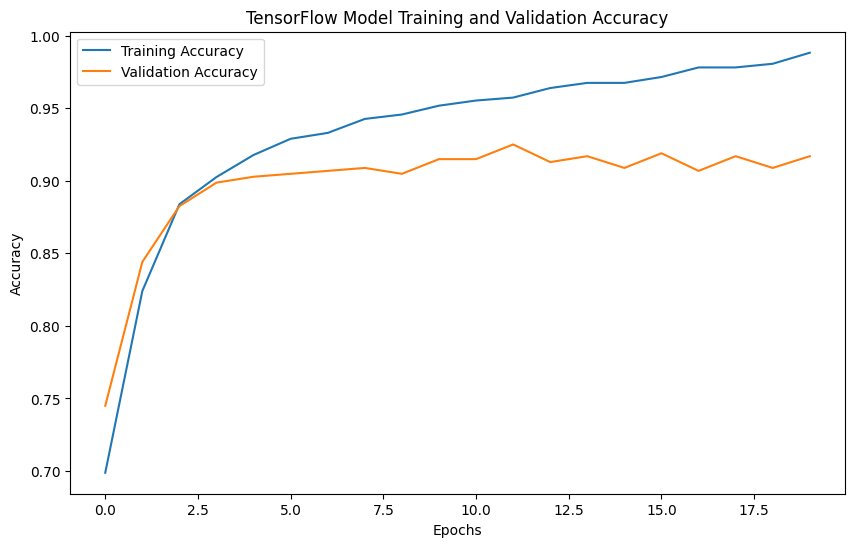

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(history_tf.history['acc'], label='Training Accuracy')
plt.plot(history_tf.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('TensorFlow Model Training and Validation Accuracy')
plt.show()


## 6.2 PyTorch Model

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim

In [57]:
x_train = x_train.astype(int)
x_test = x_test.astype(int)

In [58]:
x_train_pt = torch.tensor(x_train.values, dtype=torch.float32)
x_test_pt = torch.tensor(x_test.values, dtype=torch.float32)
y_train_pt = torch.tensor(y_train.values, dtype=torch.float32)
y_test_pt = torch.tensor(y_test.values, dtype=torch.float32)

In [59]:
class EmployeeAttritionModel(nn.Module):
    def __init__(self):
        super(EmployeeAttritionModel, self).__init__()
        self.fc1=nn.Linear(x_train_pt.shape[1],64)
        self.fc2=nn.Linear(64,32)
        self.fc3=nn.Linear(32,1)

    def forward(self,x):
        x=torch.relu(self.fc1(x))
        x=torch.relu(self.fc2(x))
        x=torch.sigmoid(self.fc3(x))
        return x


In [60]:
model_pytorch = EmployeeAttritionModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model_pytorch.parameters(),lr=0.01)

In [78]:
for epoch in range(20):
    model_pytorch.train()
    optimizer.zero_grad()
    output=model_pytorch(x_train_pt)
    loss=criterion(output.squeeze(),y_train_pt)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}/{20}, Loss: {loss.item()}')


Epoch 1/20, Loss: 0.07624902576208115
Epoch 2/20, Loss: 0.07187367975711823
Epoch 3/20, Loss: 0.06734322011470795
Epoch 4/20, Loss: 0.06278818845748901
Epoch 5/20, Loss: 0.05852136388421059
Epoch 6/20, Loss: 0.05440456420183182
Epoch 7/20, Loss: 0.050348468124866486
Epoch 8/20, Loss: 0.046472229063510895
Epoch 9/20, Loss: 0.04284718260169029
Epoch 10/20, Loss: 0.03945288434624672
Epoch 11/20, Loss: 0.03610990568995476
Epoch 12/20, Loss: 0.033219464123249054
Epoch 13/20, Loss: 0.031025132164359093
Epoch 14/20, Loss: 0.029366347938776016
Epoch 15/20, Loss: 0.025888966396450996
Epoch 16/20, Loss: 0.0221851859241724
Epoch 17/20, Loss: 0.02095823734998703
Epoch 18/20, Loss: 0.019090529531240463
Epoch 19/20, Loss: 0.016616828739643097
Epoch 20/20, Loss: 0.015812698751688004


In [79]:
model_pytorch.eval()
with torch.no_grad():
    y_predict_pt_prob = model_pytorch(x_test_pt)
    y_predict_pt = (y_predict_pt_prob > 0.5).float()



In [80]:
accuracy_pt = accuracy_score(y_test_pt, y_predict_pt)
conf_matrix = confusion_matrix(y_test_pt, y_predict_pt)
class_report = classification_report(y_test_pt, y_predict_pt)


In [81]:
print("Accuracy:", accuracy_pt)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8947368421052632
Confusion Matrix:
 [[218  29]
 [ 23 224]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       247
         1.0       0.89      0.91      0.90       247

    accuracy                           0.89       494
   macro avg       0.89      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494



## 6.3 DNN Model Comparison

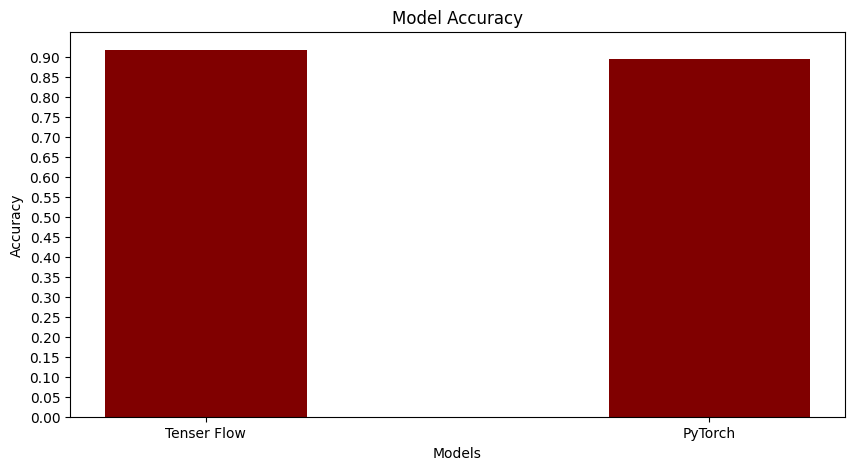

In [82]:
models = ['Tenser Flow','PyTorch']
accuracy = [accuracy_tf, accuracy_pt,]
plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color = 'Maroon', width = 0.4)
y_ticks = np.arange(0, 0.95, 0.05)
plt.yticks(y_ticks)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# Conclusion

In this analysis, we identified job satisfaction and salary levels as key factors influencing employee attrition. The Random Forest model achieved the highest accuracy at 92.3%, with the TensorFlow DNN following closely at 91.7%. These models highlight the strengths of both traditional machine learning and deep learning in predictive analytics.

Recommendations:

Enhance Job Satisfaction: Implement feedback sessions and recognition programs.

Promote Work-Life Balance: Consider flexible hours and wellness programs.

Support Career Development: Provide skill-building and mentorship opportunities.